In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [11]:
df =pd.read_csv('knnData/KNN_Project_Data')

In [12]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


<AxesSubplot:>

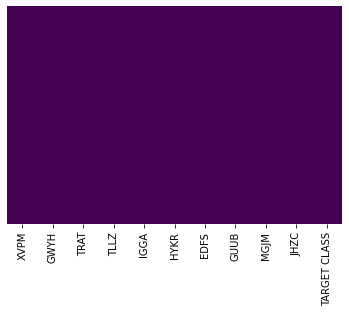

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
scaler = StandardScaler()

In [16]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [19]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [22]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns.drop('TARGET CLASS'))

In [23]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X=df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.neighbors import KNeighborsClassifier 

In [122]:
knn = KNeighborsClassifier(n_neighbors=31)

In [123]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=31)

In [124]:
predictions = knn.predict(X_test)

In [125]:
from sklearn import metrics

In [126]:
metrics.classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.87      0.81      0.84       152\n           1       0.82      0.87      0.84       148\n\n    accuracy                           0.84       300\n   macro avg       0.84      0.84      0.84       300\nweighted avg       0.84      0.84      0.84       300\n'

In [127]:
metrics.confusion_matrix(y_test,predictions)

array([[123,  29],
       [ 19, 129]], dtype=int64)

In [128]:
error_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    matrix = metrics.confusion_matrix(y_test,pred)
    FP = matrix[0][1]
    FN = matrix[1][0]
    error_rate.append([FP,FN]) 

In [129]:
error_rate[0][1]+error_rate[0][1]

82

In [130]:
def getSmallestNoOFError(error):
    smallest = error[0][0]+error[0][1]
    index = 0
    for i in range(1,len(error)):
        current = error[i][0]+error[i][1]
        if current < smallest:
            smallest = current
            index = i
    return "smallest : "+ str(smallest) + ' And index :' + str(index)

In [131]:
error_check = getSmallestNoOFError(error_rate)

In [132]:
error_check

'smallest : 48 And index :30'

In [117]:
error_rate2 = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate2.append(np.mean(pred != y_test)) 

Text(0, 0.5, 'Error Rate')

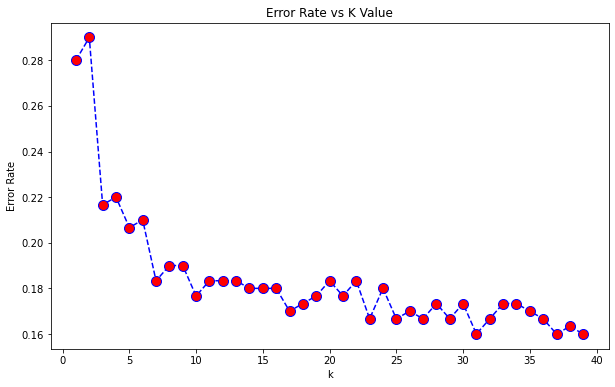

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate2,color = 'blue',linestyle='dashed',marker = 'o',markerfacecolor = 'red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('k')
plt.ylabel('Error Rate')